# Vehicle Price Prediction

### Problem Statement
#### Develop a machine learning model that accurately predicts the price of a vehicle based on its features.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### DVM Car dataset is created and maintained by University of Glassgow, University of sotheren california and University of Lincoln
DVM Car Dataset: A large-scale dataset for Automotive Applications. DVM Car Dataset: A Large-Scale Dataset for Automotive Applications. https://deepvisualmarketing.github.io/ 
### US Historic monthly inflation Data
Historical inflation rates: 1914-2023. US Inflation Calculator | Easily calculate how the buying power of the U.S. dollar has changed from 1913 to 2023. Get inflation rates and U.S. inflation news. (2023, April 12). https://www.usinflationcalculator.com/inflation/historical-inflation-rates/ 
### US gas Prices monthly
U.S. all grades all formulations retail gasoline prices (dollars per gallon). (n.d.). https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_nus_dpg&f=m 

### DVM car data set came is in 7 different CSV files 
### Excel was able to the handle the load so we merged the tables using excel

In [58]:
Ad_table= pd.read_csv("Ad_table added featurs 0504.csv")

C:\Users\gonup\AppData\Local\Temp\ipykernel_38040\4041718380.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  Ad_table= pd.read_csv("Ad_table added featurs 0504.csv")


In [59]:
Ad_table

,ÿMaker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Average_mpg,Top_speed,Seat_num,Door_num,inflation,Sales,last_produced_year,Entrée_Price,Gas_Emission,Fuel_type.1
0,Bentley,Arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,...,NaN,NaN,5.0,4.0,2.5,0,2012,174400.0,456.0,2.873
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,...,13.7 mpg,179 mph,5.0,4.0,2.9,0,2012,174400.0,456.0,2.970
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,...,14.7 mpg,155 mph,5.0,4.0,2.2,0,2012,174400.0,456.0,2.678
3,Bentley,Arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,...,NaN,NaN,5.0,4.0,2.5,0,2012,174400.0,456.0,2.873
4,Bentley,Arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,...,NaN,NaN,5.0,4.0,2.2,0,2012,174400.0,456.0,2.678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268247,Westfield,Sport,97_1,97_1$$1,2018,5,Yellow,2006.0,Convertible,1800,...,NaN,NaN,2.0,NaN,2.8,0,NaN,NaN,NaN,2.987
268248,Westfield,Sport,97_1,97_1$$2,2018,5,Yellow,2006.0,Convertible,2009,...,NaN,NaN,NaN,NaN,2.8,0,NaN,NaN,NaN,1.000
268249,Zenos,E10,99_1,99_1$$1,2018,3,Red,2016.0,Convertible,6,...,NaN,NaN,2.0,NaN,2.4,0,2017.0,NaN,NaN,2.709
268250,Zenos,E10,99_1,99_1$$2,2018,3,Green,2016.0,Convertible,1538,...,NaN,NaN,2.0,NaN,2.4,0,2017.0,NaN,NaN,2.709


In [60]:
Ad_table.describe()

,Adv_year,Adv_month,Reg_year,Engin_size,Price,Engine_power,Wheelbase,Height,Width,Length,Seat_num,Door_num,inflation,Sales,Entrée_Price,Gas_Emission,Fuel_type.1
count,268252.000000,268252.000000,268245.000000,266188.000000,2.671070e+05,236442.000000,240255.000000,240452.000000,240173.000000,240452.000000,261778.000000,263700.000000,268252.000000,268252.000000,237466.000000,228752.000000,268252.000000
mean,2018.127846,5.625971,2012.708505,1.963535,1.475596e+04,150.545842,2564.546865,1530.676455,1896.004859,4370.988280,4.904320,4.371612,2.747290,11071.976246,25238.475933,167.613341,3.012107
std,0.747200,2.090757,4.465672,9.362221,3.232048e+04,84.476488,490.004129,163.947060,150.998988,423.409308,0.877919,1.009322,0.560416,17268.050260,20943.895396,55.967532,0.246345
min,2013.000000,1.000000,1900.000000,0.100000,1.000000e+02,17.000000,0.000000,0.000000,1191.000000,0.000000,1.000000,0.000000,-0.200000,0.000000,4999.000000,0.000000,1.000000
25%,2018.000000,4.000000,2010.000000,1.400000,4.990000e+03,99.000000,2511.000000,1456.000000,1780.000000,4081.000000,5.000000,4.000000,2.500000,0.000000,14935.000000,129.000000,2.914000
50%,2018.000000,5.000000,2014.000000,1.800000,9.299000e+03,128.000000,2640.000000,1494.000000,1884.000000,4385.000000,5.000000,5.000000,2.700000,3549.000000,19865.000000,156.000000,2.987000
75%,2018.000000,7.000000,2016.000000,2.000000,1.715000e+04,175.000000,2752.000000,1624.000000,2020.000000,4672.000000,5.000000,5.000000,2.900000,12737.000000,27645.000000,194.000000,3.218000
max,2021.000000,12.000000,2019.000000,3500.000000,9.999999e+06,740.000000,5246.000000,2660.000000,2690.000000,6165.000000,17.000000,7.000000,5.400000,89564.000000,320120.000000,530.000000,4.001000


In [61]:
# Replace zeros with NaN
Ad_table.replace(0, np.nan, inplace=True)

#### columns Engine_size,Wheelbase,Height,Length,Door_num, Sales,Gas_Emissions are having zeros in few cells which needs to be rectified and there are missing values in many columns

### % NA in each column

In [62]:
na_percentages = Ad_table.isna().mean() * 100
print(na_percentages)


ÿMaker                 0.000000
 Genmodel              0.000000
 Genmodel_ID           0.000000
Adv_ID                 0.000000
Adv_year               0.000000
Adv_month              0.000000
Color                  8.154646
Reg_year               0.002609
Bodytype               0.355636
Runned_Miles           0.393287
Engin_size             0.769426
Gearbox                0.062255
Fuel_type              0.152469
Price                  0.426837
Engine_power          11.858253
Annual_Tax            17.398938
Wheelbase             13.204375
Height                10.715670
Width                 10.467396
Length                10.396195
Average_mpg           15.631570
Top_speed             16.253746
Seat_num               2.413402
Door_num               1.697285
inflation              0.008201
Sales                 27.745925
last_produced_year    10.864038
Entrée_Price          11.476522
Gas_Emission          14.963542
Fuel_type.1            0.000000
dtype: float64


### There are 11 columns with more than 10% NA 

In [63]:
# Formating the column names by striping the spaces and capitalize
Ad_table.columns = Ad_table.columns.str.strip().str.capitalize()

In [64]:
Ad_table.columns

Index(['Ÿmaker', 'Genmodel', 'Genmodel_id', 'Adv_id', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Engine_power', 'Annual_tax',
       'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', 'Top_speed',
       'Seat_num', 'Door_num', 'Inflation', 'Sales', 'Last_produced_year',
       'Entrée_price', 'Gas_emission', 'Fuel_type.1'],
      dtype='object')

### Few columns have high NAs in some cases the valuse could be fetched from other rows with matching Genmodel_id, Entree_price and Gas_emission can't exactly be correct but tend to be closer

In [65]:
cols = ['Wheelbase', 'Height', 'Width','Length','Seat_num','Door_num','Entrée_price','Gas_emission' ] # replace Column2 and Column3 with the actual names of the columns you want to pass

col_dict = {}
for col in cols:
    col_dict[col] = dict(Ad_table.loc[Ad_table[col].notnull(), ['Genmodel_id', col]].values)

for col in cols:
    Ad_table[col] = Ad_table.apply(lambda row: col_dict[col].get(row['Genmodel_id'], row[col]) if pd.isna(row[col]) else row[col], axis=1)


In [66]:
na_percentages = Ad_table.isna().mean() * 100
print(na_percentages)

Ÿmaker                 0.000000
Genmodel               0.000000
Genmodel_id            0.000000
Adv_id                 0.000000
Adv_year               0.000000
Adv_month              0.000000
Color                  8.154646
Reg_year               0.002609
Bodytype               0.355636
Runned_miles           0.393287
Engin_size             0.769426
Gearbox                0.062255
Fuel_type              0.152469
Price                  0.426837
Engine_power          11.858253
Annual_tax            17.398938
Wheelbase              3.311066
Height                 0.441749
Width                  0.321340
Length                 0.315748
Average_mpg           15.631570
Top_speed             16.253746
Seat_num               0.024231
Door_num               0.114817
Inflation              0.008201
Sales                 27.745925
Last_produced_year    10.864038
Entrée_price          11.476522
Gas_emission          11.738589
Fuel_type.1            0.000000
dtype: float64


### colour is something which can't be assumed and we belive in real world its significance in used cars is not high so we are droping the column because of NAs

### Last produced year is the column created from sales data. it is not possible to predict missing values and as there are many missing values we decided to drop the column

In [67]:
Ad_table = Ad_table.drop(['Color','Last_produced_year'], axis=1)

In [68]:
Ad_table.dropna(inplace=True)


### Engine_power,, Anual_tax, Average_mpg, Top_speed, Entree_price, Gas_Emission are the colums with more than 10% NA's but chose not to drop considering their significance

In [69]:
na_percentages = Ad_table.isna().mean() * 100
print(na_percentages)

Ÿmaker          0.0
Genmodel        0.0
Genmodel_id     0.0
Adv_id          0.0
Adv_year        0.0
Adv_month       0.0
Reg_year        0.0
Bodytype        0.0
Runned_miles    0.0
Engin_size      0.0
Gearbox         0.0
Fuel_type       0.0
Price           0.0
Engine_power    0.0
Annual_tax      0.0
Wheelbase       0.0
Height          0.0
Width           0.0
Length          0.0
Average_mpg     0.0
Top_speed       0.0
Seat_num        0.0
Door_num        0.0
Inflation       0.0
Sales           0.0
Entrée_price    0.0
Gas_emission    0.0
Fuel_type.1     0.0
dtype: float64


#### after deleting clearing rows with NA's we are left with 70% rows of the orginal rows and droped 2 columns 

In [70]:
Ad_table

,Ÿmaker,Genmodel,Genmodel_id,Adv_id,Adv_year,Adv_month,Reg_year,Bodytype,Runned_miles,Engin_size,...,Length,Average_mpg,Top_speed,Seat_num,Door_num,Inflation,Sales,Entrée_price,Gas_emission,Fuel_type.1
37,Bentley,Bentayga,10_3,10_3$$7,2018,8,2017.0,SUV,10972,6.0,...,5140.0,22.1 mpg,187 mph,5.0,5.0,2.7,526.0,160200.0,292.0,2.914
38,Bentley,Bentayga,10_3,10_3$$8,2018,8,2018.0,SUV,5963,4.0,...,5140.0,24.8 mpg,180 mph,5.0,5.0,2.7,526.0,160200.0,210.0,2.914
39,Bentley,Bentayga,10_3,10_3$$9,2018,8,2018.0,SUV,1000,4.0,...,5140.0,38.2 mpg,167 mph,5.0,5.0,2.7,526.0,160200.0,210.0,3.218
40,Bentley,Bentayga,10_3,10_3$$10,2018,6,2016.0,SUV,16526,6.0,...,5140.0,22.1 mpg,187 mph,5.0,5.0,2.9,526.0,160200.0,292.0,2.970
41,Bentley,Bentayga,10_3,10_3$$11,2018,7,2016.0,SUV,16200,6.0,...,5140.0,22.1 mpg,187 mph,5.0,5.0,2.9,526.0,160200.0,292.0,2.928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268242,Volvo,V50,96_9,96_9$$522,2018,7,2008.0,Estate,140000,2.0,...,4522.0,48.7 mpg,127 mph,5.0,5.0,2.9,1.0,19375.0,153.0,3.233
268243,Volvo,V50,96_9,96_9$$523,2018,8,2007.0,Estate,158000,2.4,...,4522.0,40.4 mpg,137 mph,5.0,5.0,2.7,1.0,19375.0,203.0,3.218
268244,Volvo,V50,96_9,96_9$$524,2018,5,2009.0,Estate,94000,2.4,...,4522.0,40.4 mpg,137 mph,5.0,5.0,2.8,1.0,19375.0,203.0,3.244
268245,Volvo,V50,96_9,96_9$$525,2018,5,2004.0,Estate,111000,2.4,...,4514.0,31.0 mpg,134 mph,5.0,5.0,2.8,1.0,19375.0,203.0,2.987


#### removing non- numaric characters from numaric columns

In [71]:
# Remove non-numeric characters and empty strings from specified columns
Ad_table[['Runned_miles', 'Annual_tax', 'Average_mpg', 'Top_speed']] = Ad_table[['Runned_miles', 'Annual_tax', 'Average_mpg', 'Top_speed']].replace(r'[^\d.]', '', regex=True).replace('', np.nan)

# Convert specified columns to float
Ad_table[['Runned_miles', 'Annual_tax', 'Average_mpg', 'Top_speed']] = Ad_table[['Runned_miles', 'Annual_tax', 'Average_mpg', 'Top_speed']].astype(float)



#### converting all columns to float ignoring 

In [72]:
# Convert all columns to float, ignoring errors
Ad_table = Ad_table.applymap(lambda x: float(x) if isinstance(x, (int, float)) else x)

In [73]:
corr = Ad_table.corr()

corr

,Adv_year,Adv_month,Reg_year,Runned_miles,Engin_size,Price,Engine_power,Annual_tax,Wheelbase,Height,...,Length,Average_mpg,Top_speed,Seat_num,Door_num,Inflation,Sales,Entrée_price,Gas_emission,Fuel_type.1
Adv_year,1.000000,-0.357356,-0.013176,0.031231,-0.065523,-0.055902,-0.063972,-0.051470,-0.040336,0.006123,...,-0.051015,0.019858,-0.059275,0.023261,0.029830,0.547102,0.038917,-0.066788,-0.042162,0.377668
Adv_month,-0.357356,1.000000,-0.046392,0.054865,0.000395,-0.029636,-0.002775,0.012848,-0.013475,-0.016022,...,-0.006522,-0.025741,0.002363,0.000322,-0.031653,0.313735,0.066374,0.000440,0.024791,0.141062
Reg_year,-0.013176,-0.046392,1.000000,-0.717067,-0.079091,0.383477,0.071871,-0.383450,0.115739,0.105344,...,0.082907,0.442987,0.053806,0.003939,0.127255,-0.053600,-0.156420,0.019897,-0.219152,0.036879
Runned_miles,0.031231,0.054865,-0.717067,1.000000,0.100105,-0.345102,-0.047369,0.234281,0.053783,-0.032105,...,0.088037,-0.251369,-0.001016,0.088724,-0.008421,0.068576,0.110325,-0.006451,0.199189,0.149640
Engin_size,-0.065523,0.000395,-0.079091,0.100105,1.000000,0.564683,0.898667,0.642925,0.553204,0.138314,...,0.664997,-0.509730,0.757457,-0.057872,-0.163321,-0.053405,-0.201792,0.817937,0.789915,0.181944
Price,-0.055902,-0.029636,0.383477,-0.345102,0.564683,1.000000,0.728451,0.227109,0.276838,0.005401,...,0.348125,-0.184877,0.584160,-0.180710,-0.186969,-0.069322,-0.156309,0.746988,0.347266,-0.010550
Engine_power,-0.063972,-0.002775,0.071871,-0.047369,0.898667,0.728451,1.000000,0.581017,0.489340,0.020124,...,0.601273,-0.492954,0.877382,-0.164659,-0.246627,-0.057199,-0.214926,0.842684,0.692398,0.065365
Annual_tax,-0.051470,0.012848,-0.383450,0.234281,0.642925,0.227109,0.581017,1.000000,0.274913,0.182039,...,0.367712,-0.792522,0.445707,-0.004349,-0.141205,-0.032865,-0.080844,0.520407,0.647236,-0.084259
Wheelbase,-0.040336,-0.013475,0.115739,0.053783,0.553204,0.276838,0.489340,0.274913,1.000000,0.346426,...,0.873513,-0.151804,0.475115,0.405868,0.241376,-0.045009,-0.228517,0.490415,0.477205,0.367482
Height,0.006123,-0.016022,0.105344,-0.032105,0.138314,0.005401,0.020124,0.182039,0.346426,1.000000,...,0.283149,-0.149882,-0.233733,0.557105,0.516834,0.004026,-0.076001,0.084468,0.191774,0.247182


In [74]:
Ad_table.dtypes

Ÿmaker           object
Genmodel         object
Genmodel_id      object
Adv_id           object
Adv_year        float64
Adv_month       float64
Reg_year        float64
Bodytype         object
Runned_miles    float64
Engin_size      float64
Gearbox          object
Fuel_type        object
Price           float64
Engine_power    float64
Annual_tax      float64
Wheelbase       float64
Height          float64
Width           float64
Length          float64
Average_mpg     float64
Top_speed       float64
Seat_num        float64
Door_num        float64
Inflation       float64
Sales           float64
Entrée_price    float64
Gas_emission    float64
Fuel_type.1     float64
dtype: object

### New feature Years by substracting registration year and Advertized year

In [88]:
Ad_table['Years'] = Ad_table['Adv_year'] - Ad_table['Reg_year']

In [89]:
Ad_table.dtypes

Ÿmaker           object
Genmodel         object
Genmodel_id      object
Adv_id           object
Adv_year        float64
Adv_month       float64
Reg_year        float64
Bodytype         object
Runned_miles    float64
Engin_size      float64
Gearbox          object
Fuel_type        object
Price           float64
Engine_power    float64
Annual_tax      float64
Wheelbase       float64
Height          float64
Width           float64
Length          float64
Average_mpg     float64
Top_speed       float64
Seat_num        float64
Door_num        float64
Inflation       float64
Sales           float64
Entrée_price    float64
Gas_emission    float64
Fuel_type.1     float64
Years           float64
dtype: object

## Corelation

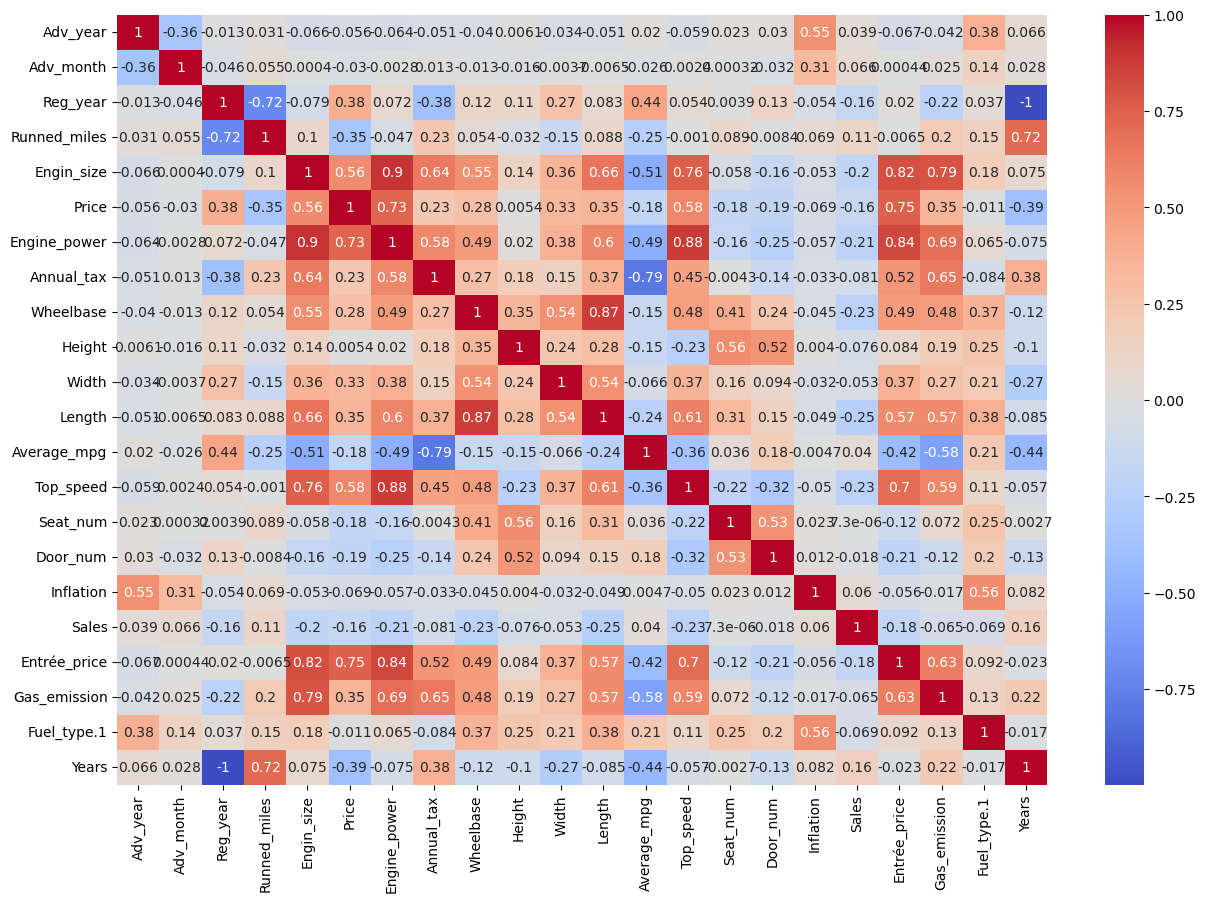

In [90]:
corr = Ad_table.corr()
# Set figure size
plt.figure(figsize=(15, 10))

# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

### Corelation to price ignoring sign to find fetures with high corelation

In [91]:
# Sort 'price' column in descending order (ignoring the sign)
sorted_price = corr['Price'].abs().sort_values(ascending=False)

# Print sorted 'price' column
print(sorted_price)

Price           1.000000
Entrée_price    0.746988
Engine_power    0.728451
Top_speed       0.584160
Engin_size      0.564683
Years           0.385616
Reg_year        0.383477
Length          0.348125
Gas_emission    0.347266
Runned_miles    0.345102
Width           0.330779
Wheelbase       0.276838
Annual_tax      0.227109
Door_num        0.186969
Average_mpg     0.184877
Seat_num        0.180710
Sales           0.156309
Inflation       0.069322
Adv_year        0.055902
Adv_month       0.029636
Fuel_type.1     0.010550
Height          0.005401
Name: Price, dtype: float64


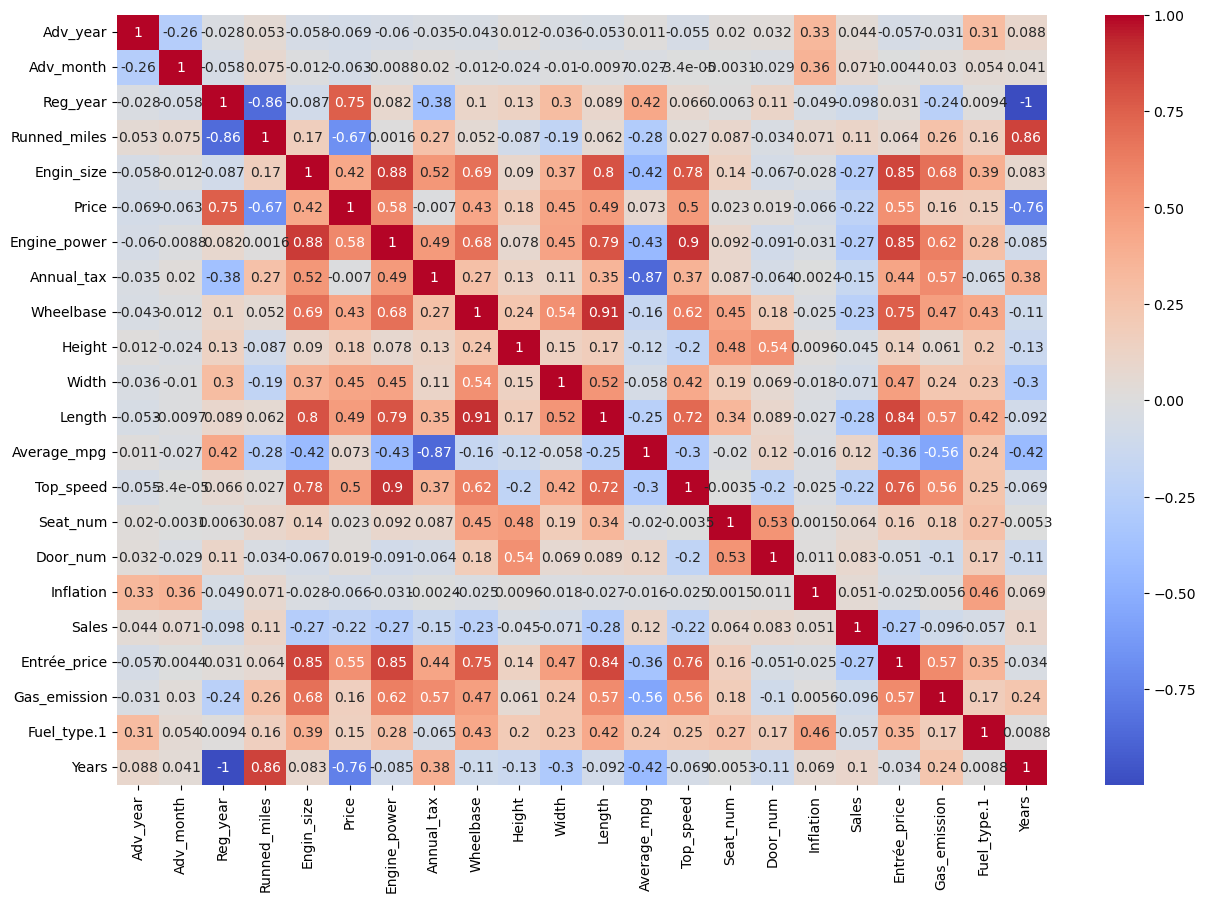

In [92]:
corr=Ad_table.corr(method='spearman')
# Set figure size
plt.figure(figsize=(15, 10))

# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

In [93]:
# Sort 'price' column in descending order (ignoring the sign)
sorted_price = corr['Price'].abs().sort_values(ascending=False)

# Print sorted 'price' column
print(sorted_price)

Price           1.000000
Years           0.755112
Reg_year        0.753678
Runned_miles    0.674188
Engine_power    0.582048
Entrée_price    0.546513
Top_speed       0.497391
Length          0.491764
Width           0.445439
Wheelbase       0.432485
Engin_size      0.423493
Sales           0.215859
Height          0.179308
Gas_emission    0.163177
Fuel_type.1     0.151584
Average_mpg     0.073288
Adv_year        0.069483
Inflation       0.065534
Adv_month       0.063273
Seat_num        0.023500
Door_num        0.019322
Annual_tax      0.006955
Name: Price, dtype: float64


## There exists high multi colinearity anong important features

In [79]:
Ad_table.to_csv("Final_df0504.csv")